In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [57]:
# 타이타닉 데이터 가져오기
titanic = pd.read_csv('train.csv')
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [107]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제
titanic_df = pd.DataFrame({"Survived":titanic["Survived"],"Age":titanic["Age"]}).reset_index(drop=True)
titanic_df1 = titanic_df.dropna(subset =["Survived","Age"]).reset_index(drop=True)
titanic_df1.tail()

,Age,Survived
709,39.0,0
710,27.0,0
711,19.0,1
712,26.0,1
713,32.0,0


In [108]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입
titanic_df1["Ages"] = pd.DataFrame(titanic_df1["Age"] // 10 *10, dtype=int)
titanic_df1.tail()

,Age,Survived,Ages
709,39.0,0,30
710,27.0,0,20
711,19.0,1,10
712,26.0,1,20
713,32.0,0,30


In [109]:
# 연령대별로 생존률
titanic_df2 = titanic_df1.groupby(["Ages","Survived"]).size().reset_index(name = "Counts")
titanic_df2
titanic_df2 = titanic_df2.pivot("Ages","Survived","Counts")
titanic_df2

Survived,0,1
Ages,,
0,24.0,38.0
10,61.0,41.0
20,143.0,77.0
30,94.0,73.0
40,55.0,34.0
50,28.0,20.0
60,13.0,6.0
70,6.0,NaN
80,NaN,1.0


In [151]:
titanic_df3 = titanic_df2

def conv(a):
    return float("%2.2f"%a)

titanic_df3["survived_rate"] = list(titanic_df2[1]/(titanic_df2[0]+titanic_df2[1])*100)

titanic_df3["survived_rate"] = titanic_df3["survived_rate"].apply(conv)

titanic_df3

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58
70,6.0,NaN,NaN
80,NaN,1.0,NaN


In [180]:
titanic_df4 = titanic_df3

titanic_df4 = titanic_df4.dropna(how = "any")

titanic_df4

Survived,0,1,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


In [12]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [182]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [220]:
survive_df = titanic_df4.rename(columns={0:"non_survived", 1:"survived"})
survive_df

Survived,non_survived,survived,survived_rate
Ages,,,
0,24.0,38.0,61.29
10,61.0,41.0,40.20
20,143.0,77.0,35.00
30,94.0,73.0,43.71
40,55.0,34.0,38.20
50,28.0,20.0,41.67
60,13.0,6.0,31.58


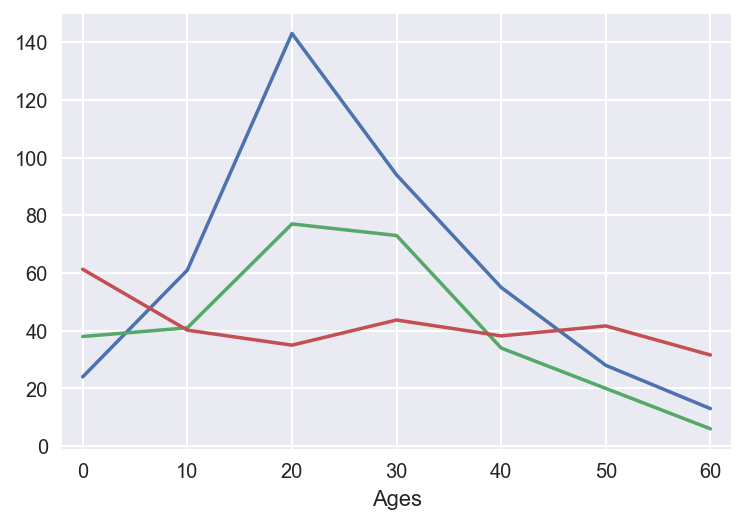

In [209]:
plt.plot(survive_df)
plt.xlim(-2,62)

plt.xlabel("Ages")

plt.show()

range(0, 61, 10) [24.0, 61.0, 143.0, 94.0, 55.0, 28.0, 13.0] [38.0, 41.0, 77.0, 73.0, 34.0, 20.0, 6.0] [61.289999999999999, 40.200000000000003, 35.0, 43.710000000000001, 38.200000000000003, 41.670000000000002, 31.579999999999998]


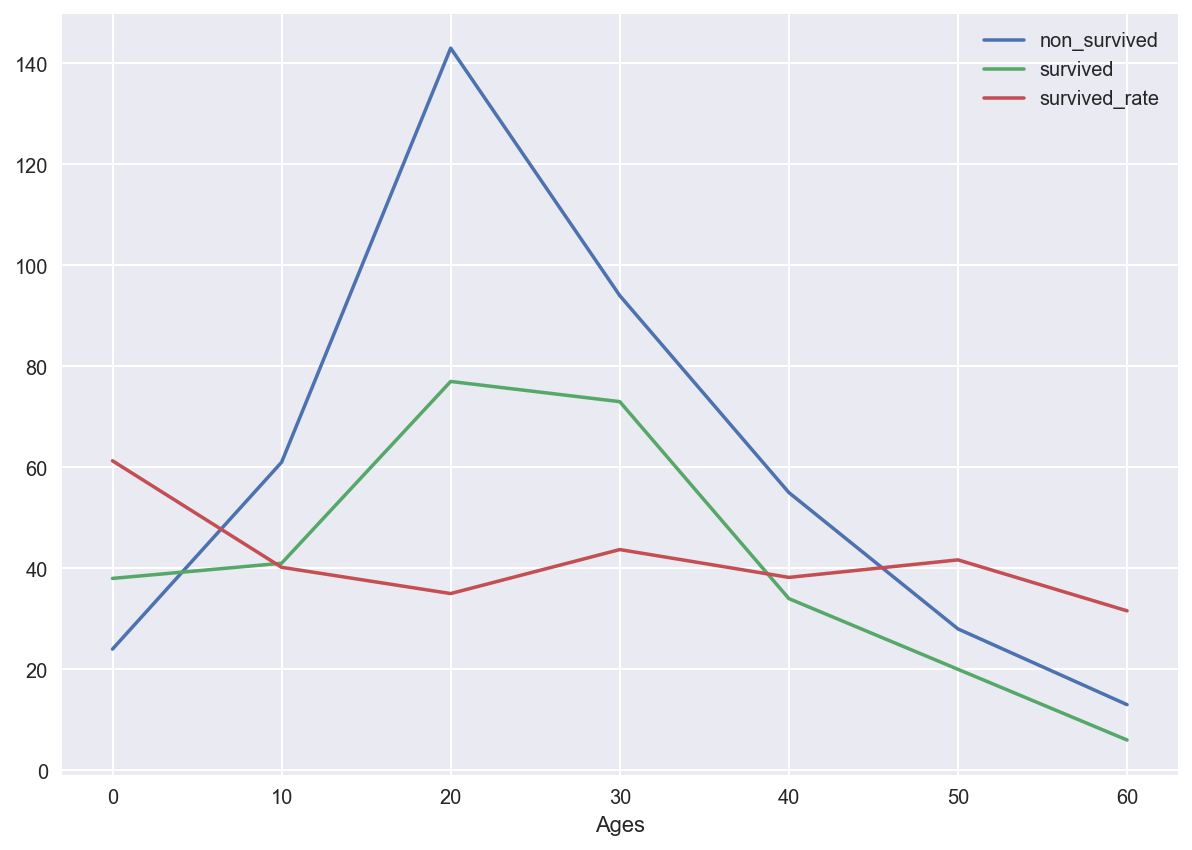

In [219]:
y1 = list(survive_df["non_survived"])
y2 = list(survive_df["survived"])
y3 = list(survive_df["survived_rate"])

plt.figure(figsize=(10,7))

x = range(0 , 61, 10)
plt.xlabel("Ages")
plt.plot(x, y1, label = "non_survived")
plt.plot(x, y2, label = "survived")
plt.plot(x, y3, label = "survived_rate")
plt.legend(loc = 0)

print(x, y1, y2, y3)
plt.show()